In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
df = df.rename(columns={"anaemia": "anemia", "creatinine_phosphokinase": "creatine_phosphokinase", "smoking": "smoker", "time" : "days_until_follow_up", "DEATH_EVENT": "patient_deceased"})

categorical_columns_names = ["anemia", "diabetes", "high_blood_pressure", "sex", "smoking"]
numerical_columns_names = ["age", "creatine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "days_until_follow_up"]

heart_failure_class_label_df = df['patient_deceased'].copy()

df.head()


,age,anemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoker,days_until_follow_up,patient_deceased
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.describe()

,age,anemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoker,days_until_follow_up,patient_deceased
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     299 non-null    float64
 1   anemia                  299 non-null    int64  
 2   creatine_phosphokinase  299 non-null    int64  
 3   diabetes                299 non-null    int64  
 4   ejection_fraction       299 non-null    int64  
 5   high_blood_pressure     299 non-null    int64  
 6   platelets               299 non-null    float64
 7   serum_creatinine        299 non-null    float64
 8   serum_sodium            299 non-null    int64  
 9   sex                     299 non-null    int64  
 10  smoker                  299 non-null    int64  
 11  days_until_follow_up    299 non-null    int64  
 12  patient_deceased        299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Checking for missing data and duplicates

In [ ]:
num_missing_data = df.isnull().sum()
num_missing_data

age                       0
anemia                    0
creatine_phosphokinase    0
diabetes                  0
ejection_fraction         0
high_blood_pressure       0
platelets                 0
serum_creatinine          0
serum_sodium              0
sex                       0
smoker                    0
days_until_follow_up      0
patient_deceased          0
dtype: int64

In [ ]:
percentage_missing_data = df.isnull().mean()
percentage_missing_data

age                       0.0
anemia                    0.0
creatine_phosphokinase    0.0
diabetes                  0.0
ejection_fraction         0.0
high_blood_pressure       0.0
platelets                 0.0
serum_creatinine          0.0
serum_sodium              0.0
sex                       0.0
smoker                    0.0
days_until_follow_up      0.0
patient_deceased          0.0
dtype: float64

In [ ]:
num_duplicate_data = df.duplicated().sum()
num_duplicate_data

0

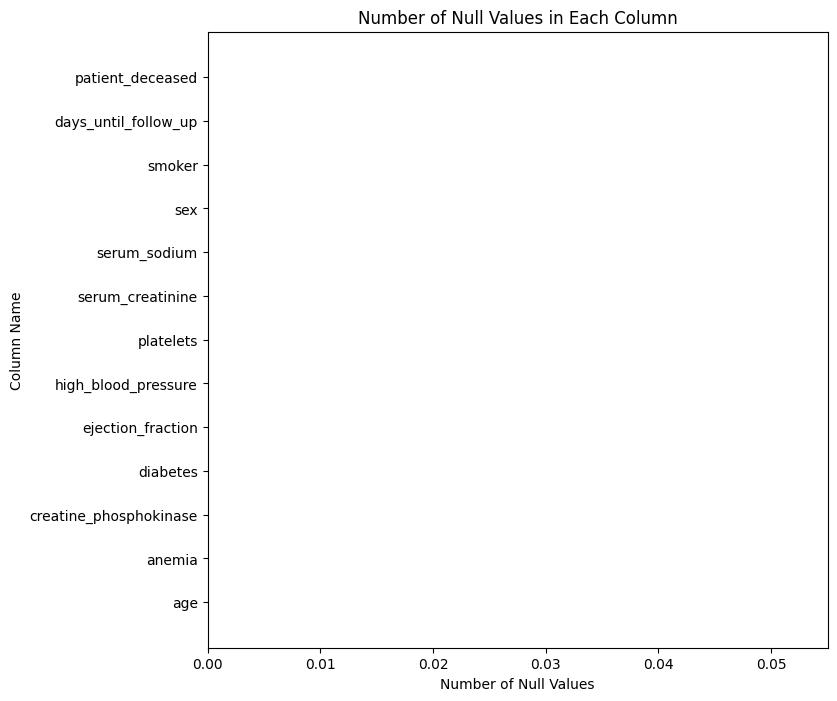

In [ ]:
missing_data = df[df.isnull().sum().sort_values().index].copy()

plt.figure(figsize=(8, 8))
plt.barh(missing_data.columns, missing_data.isnull().sum())
plt.xlim(0)
plt.title('Number of Null Values in Each Column')
plt.xlabel('Number of Null Values')
plt.ylabel('Column Name')
plt.show()

---

# Exploratory Data Analysis

## Data Distribution Among Classes

203 96


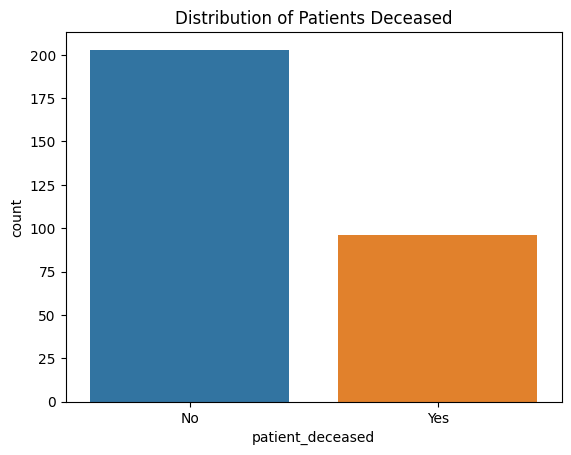

In [ ]:
def custom_formatter(category):
    return 'No' if category == 0 else 'Yes'

def gender_formatter(category):
  return "Female" if category == 0 else "Male"

survived_df = df[df['patient_deceased'] == 0]
deceased_df = df[df['patient_deceased'] == 1]
print(len(survived_df), len(deceased_df))

sns.countplot(data=df, x="patient_deceased", hue="patient_deceased", formatter=custom_formatter, legend=False)
plt.title("Distribution of Patients Deceased")
plt.show()

## Numerical Columns

In [ ]:
categorical_columns_names = ["anemia", "diabetes", "high_blood_pressure", "sex", "smoker"]
numerical_columns_names = ["age", "creatine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "days_until_follow_up"]

numerical_columns_df = df[numerical_columns_names].copy()
categorical_columns_df = df[categorical_columns_names].copy()

In [ ]:
numerical_columns_df.describe()

,age,creatine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,days_until_follow_up
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [ ]:
numerical_columns_df.nunique()

age                        47
creatine_phosphokinase    208
ejection_fraction          17
platelets                 176
serum_creatinine           40
serum_sodium               27
days_until_follow_up      148
dtype: int64

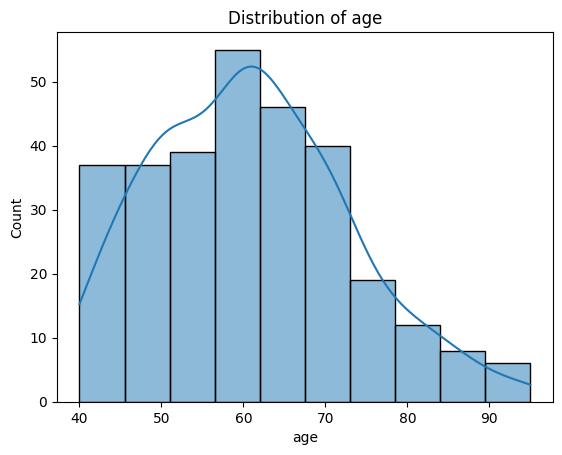

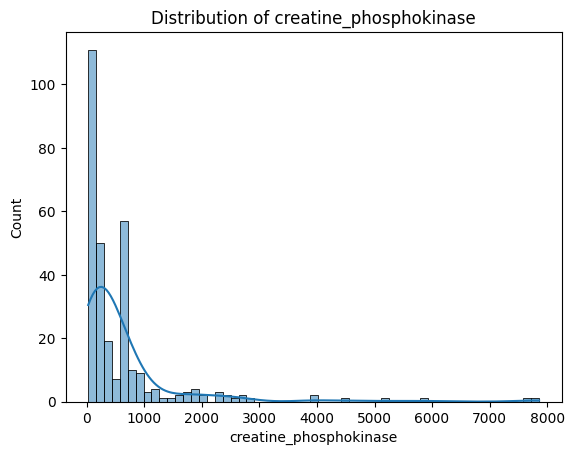

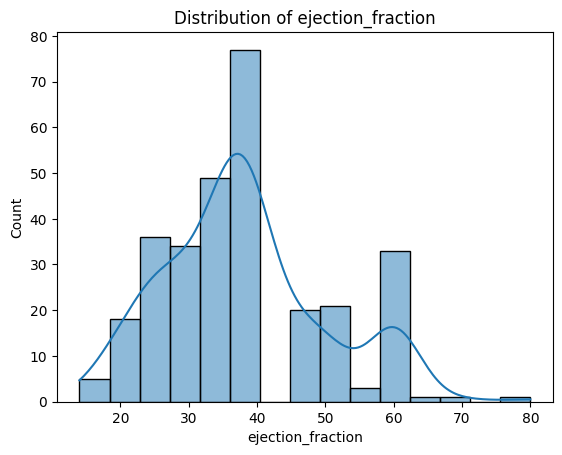

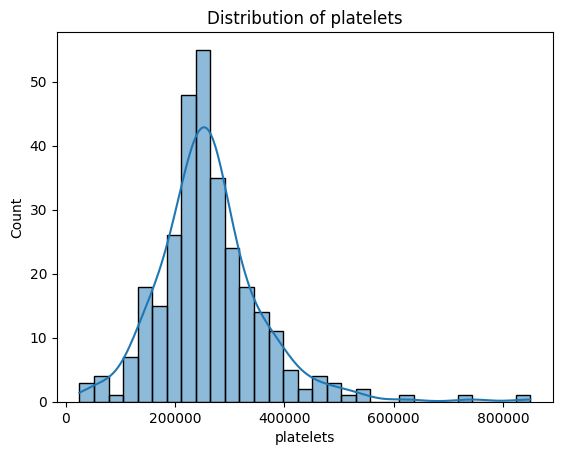

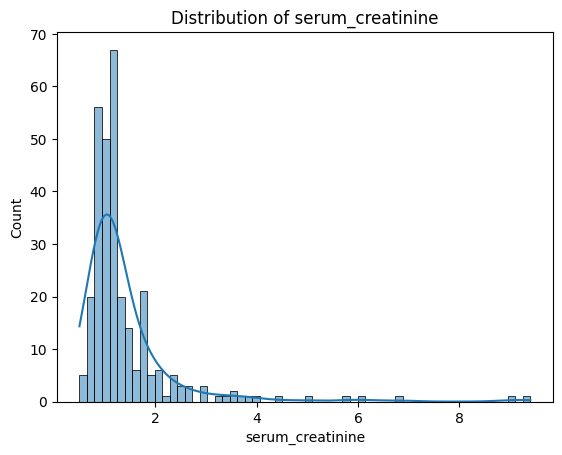

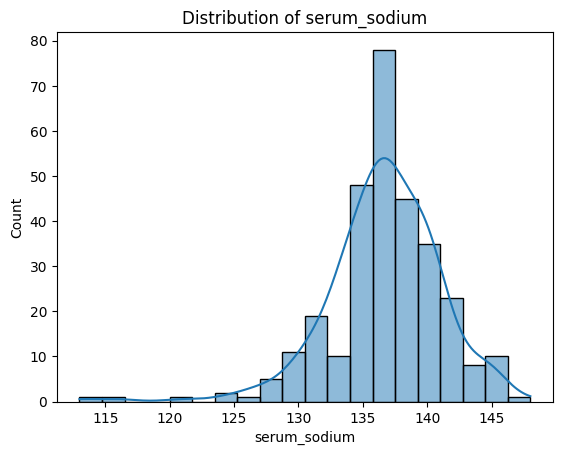

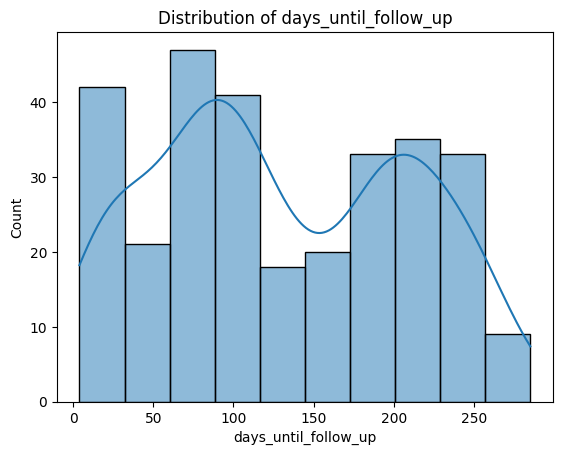

In [ ]:
for i, col in enumerate(list(numerical_columns_df.columns)):
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

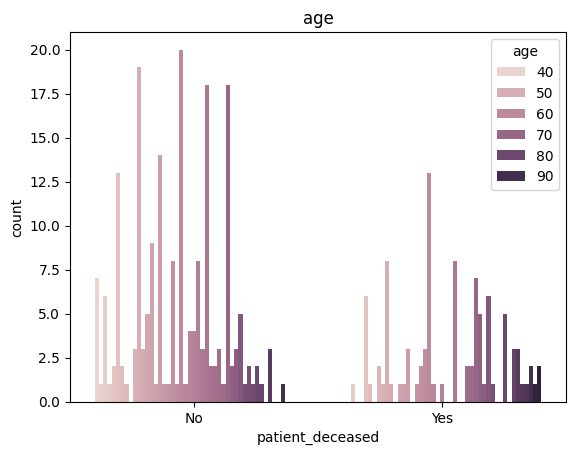

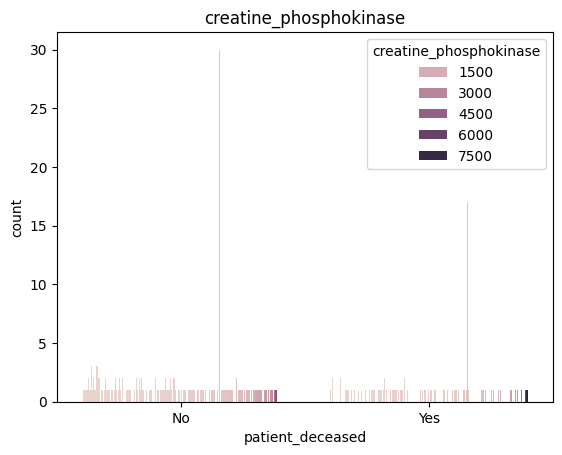

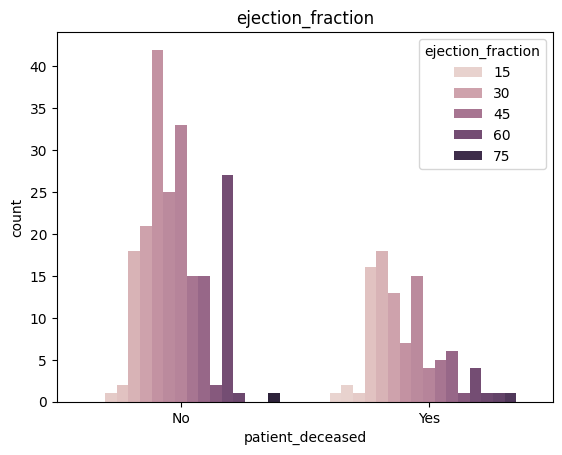

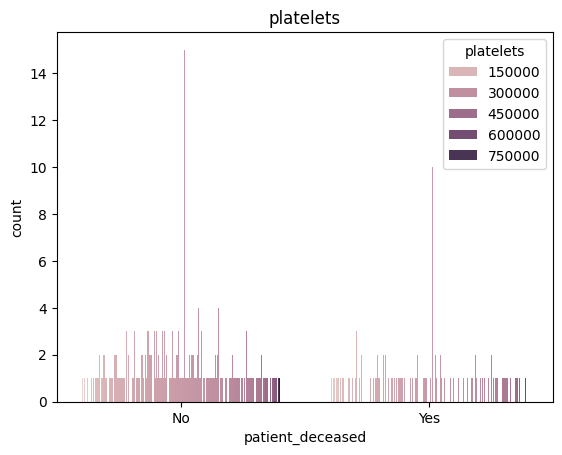

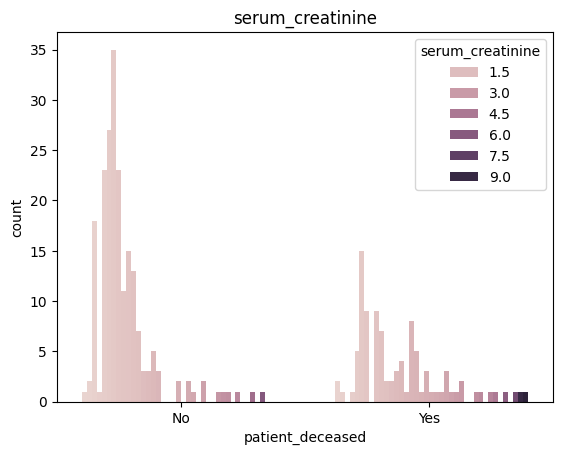

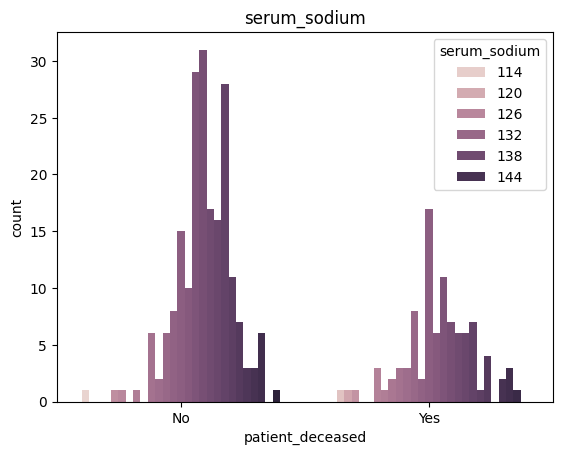

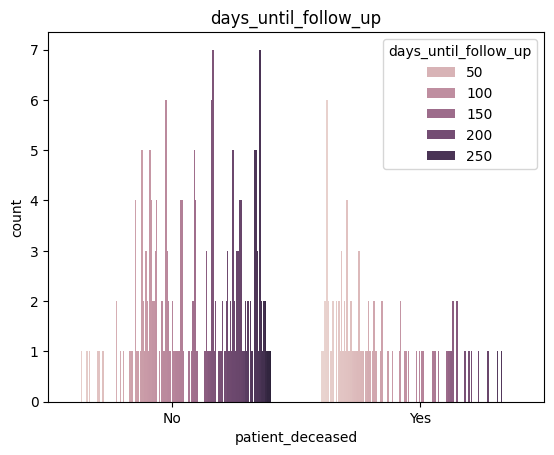

In [ ]:
for col in numerical_columns_names:
  sns.countplot(data=df, x="patient_deceased", hue=col, formatter=custom_formatter)
  plt.title(col)
  plt.show()

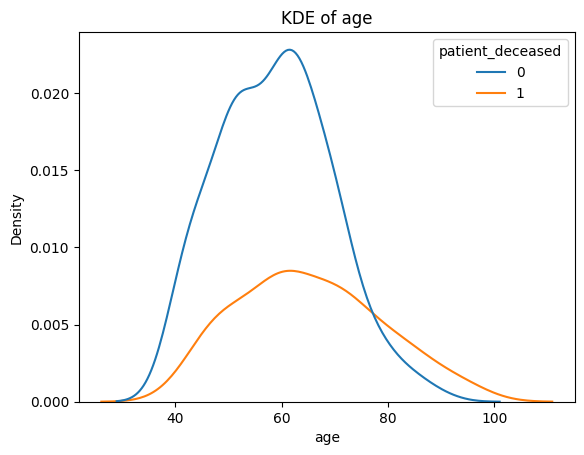

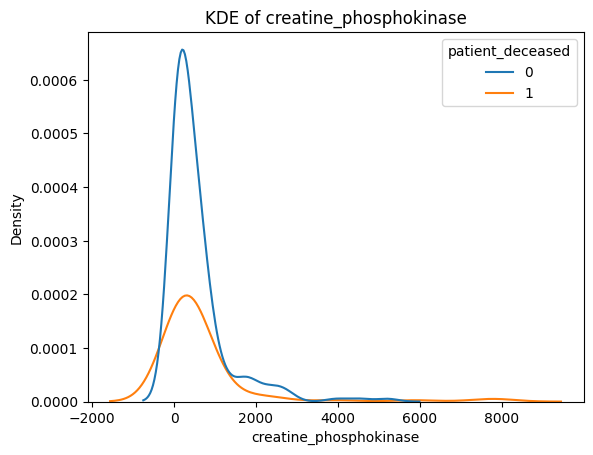

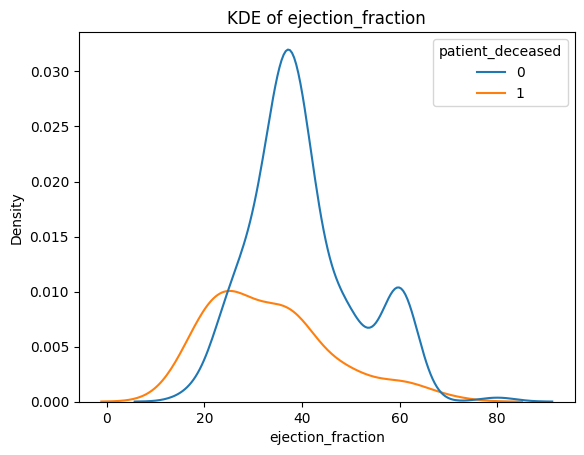

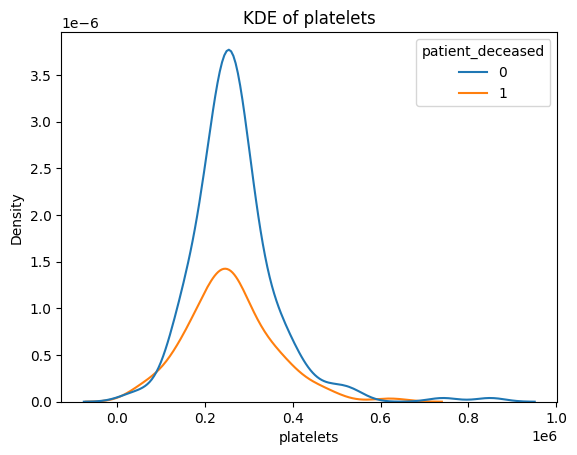

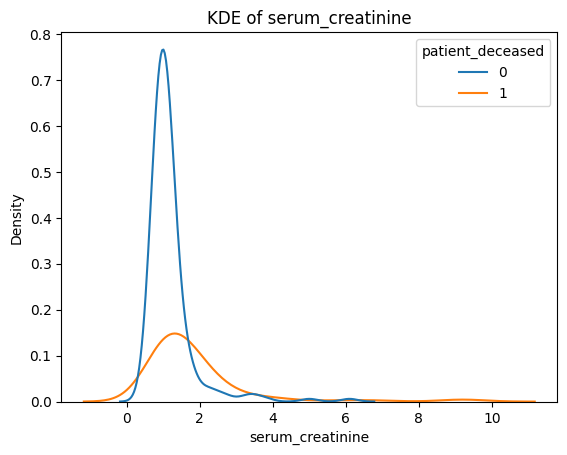

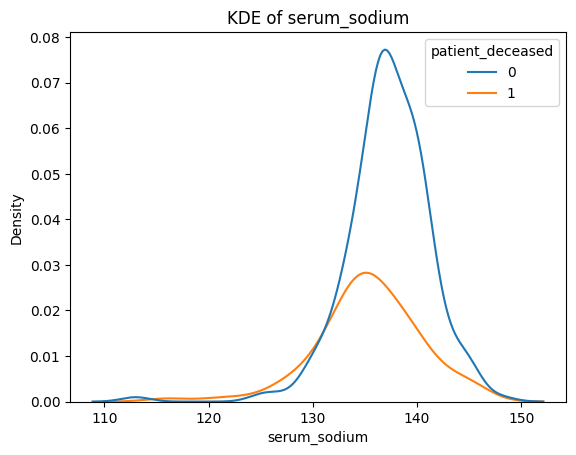

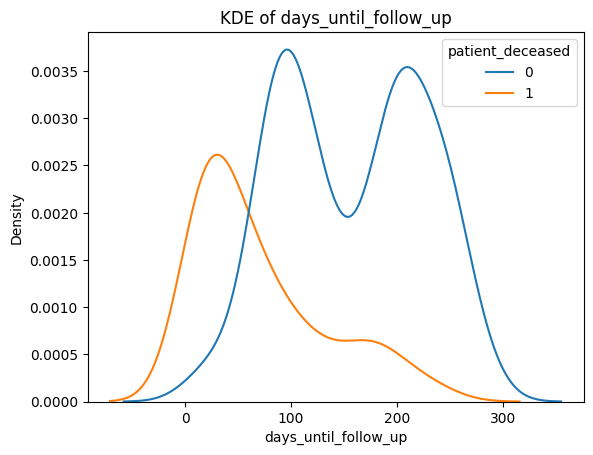

In [ ]:
for i, col in enumerate(list(numerical_columns_df.columns)):
    sns.kdeplot(df, x=col, hue="patient_deceased")
    plt.title(f"KDE of {col}")
    plt.show()

## Categorical Columns

In [ ]:
categorical_columns_df.nunique()

anemia                 2
diabetes               2
high_blood_pressure    2
sex                    2
smoker                 2
dtype: int64

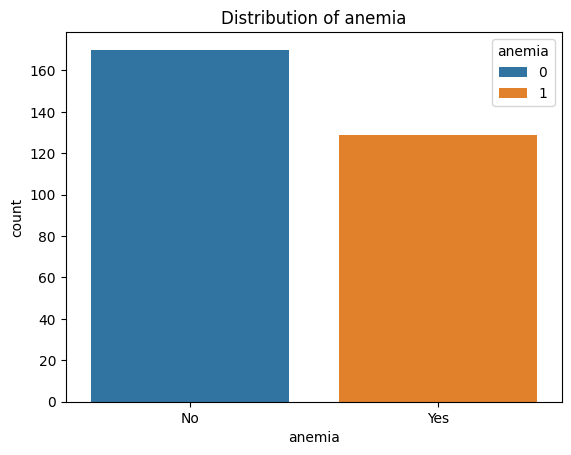

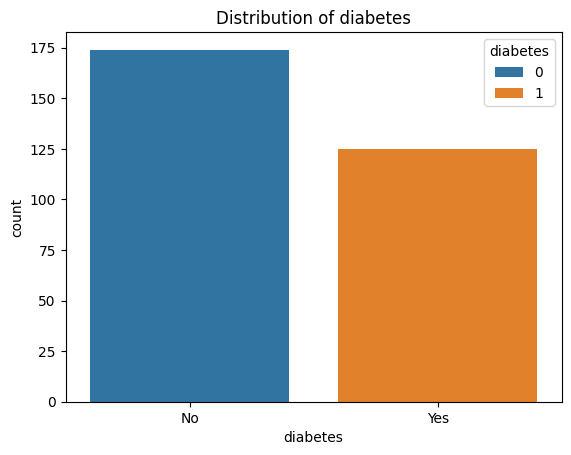

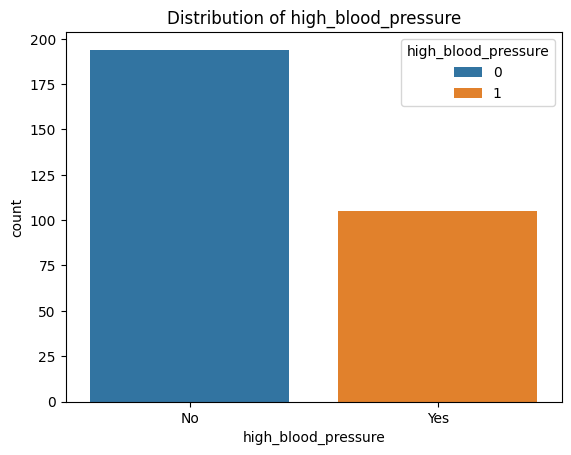

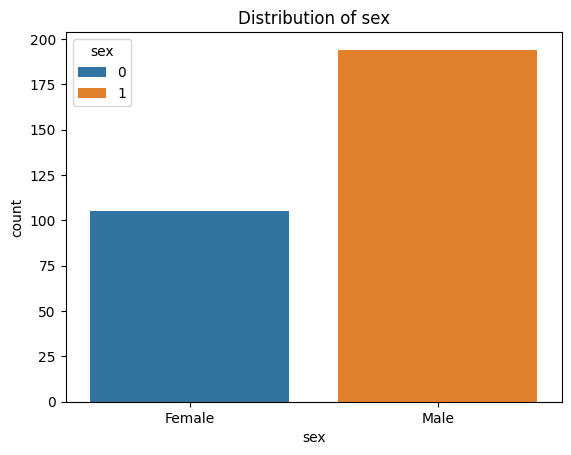

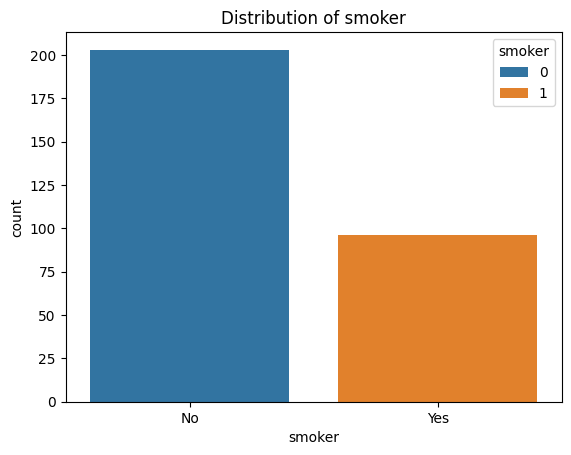

In [ ]:
for col in categorical_columns_names:
  sns.countplot(data=df, x=col, hue=col, formatter=gender_formatter if col == "sex" else custom_formatter)
  plt.title(f"Distribution of {col}")
  plt.show()

## Correlation Matrix




In [ ]:
corr_matrix = df.corr()
corr_matrix

,age,anemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoker,days_until_follow_up,patient_deceased
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


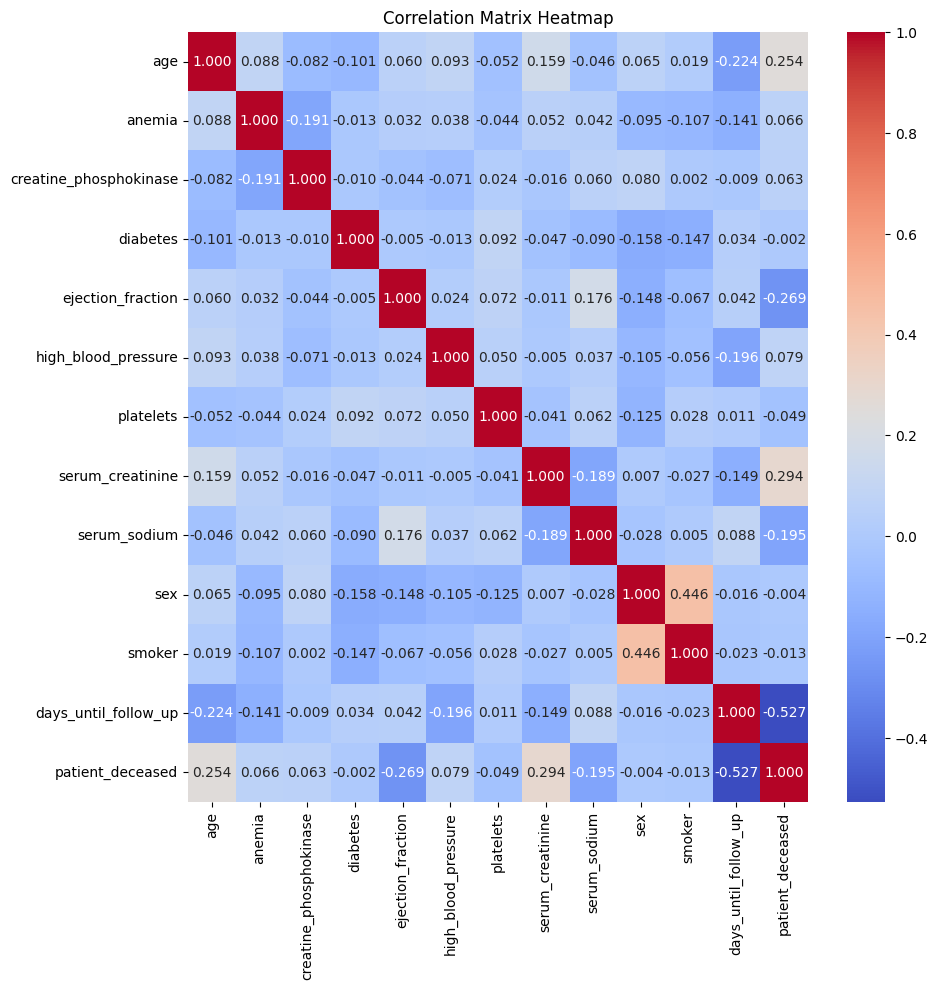

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".3f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
target_class_correlation = df.corrwith(df['patient_deceased'])
target_class_correlation.abs().sort_values(ascending=False)

patient_deceased          1.000000
days_until_follow_up      0.526964
serum_creatinine          0.294278
ejection_fraction         0.268603
age                       0.253729
serum_sodium              0.195204
high_blood_pressure       0.079351
anemia                    0.066270
creatine_phosphokinase    0.062728
platelets                 0.049139
smoker                    0.012623
sex                       0.004316
diabetes                  0.001943
dtype: float64

---

# Outlier Detection

## Original Dataset

In [ ]:
df.describe()

,age,anemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoker,days_until_follow_up,patient_deceased
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.kurt(numeric_only=True)[:]

age                       -0.184871
anemia                    -1.935563
creatine_phosphokinase    25.149046
diabetes                  -1.901254
ejection_fraction          0.041409
high_blood_pressure       -1.618076
platelets                  6.209255
serum_creatinine          25.828239
serum_sodium               4.119712
sex                       -1.618076
smoker                    -1.416080
days_until_follow_up      -1.212048
patient_deceased          -1.416080
dtype: float64

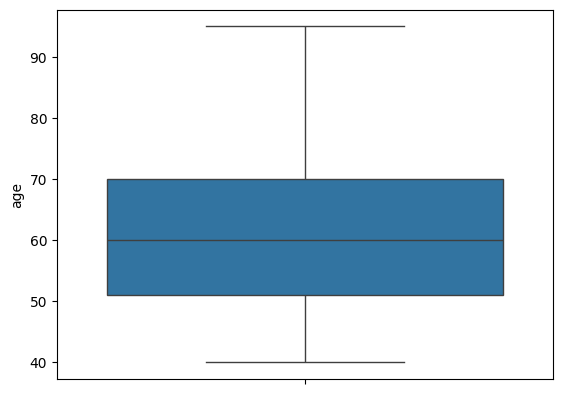

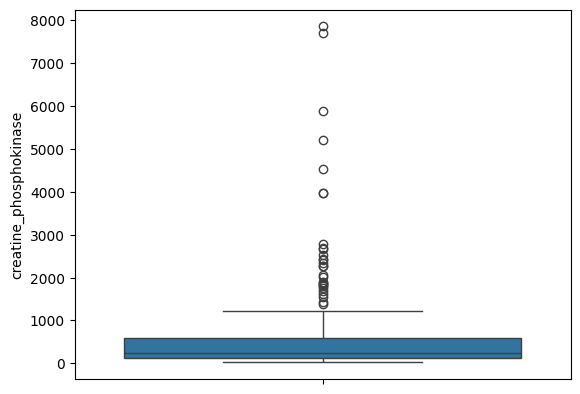

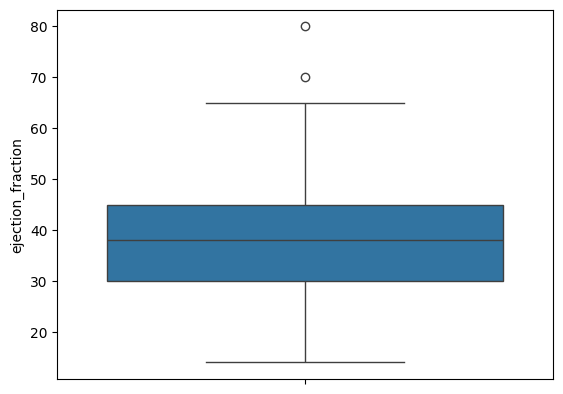

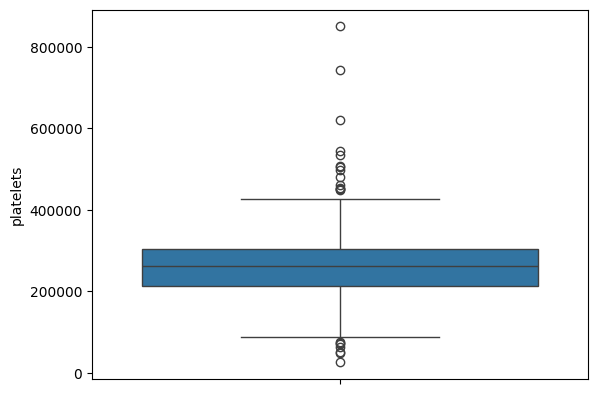

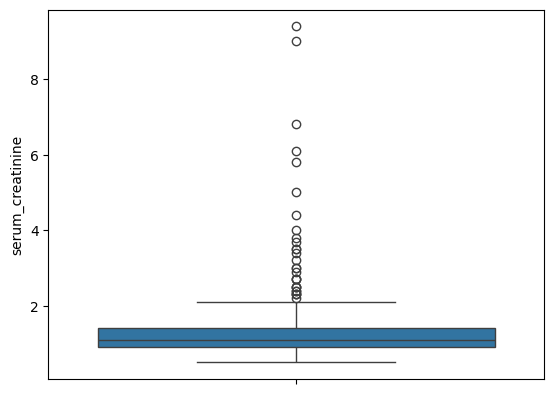

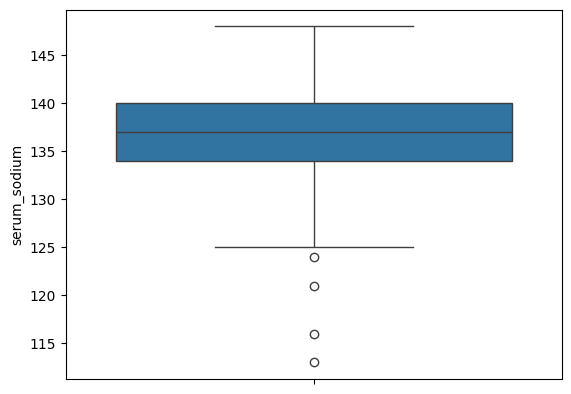

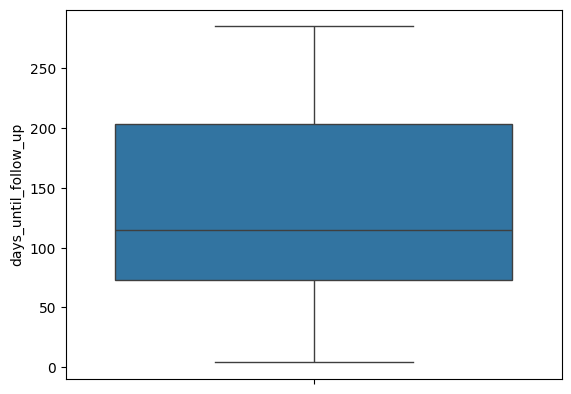

In [ ]:
for col in numerical_columns_names:
  sns.boxplot(data=df, y=col)
  plt.show()

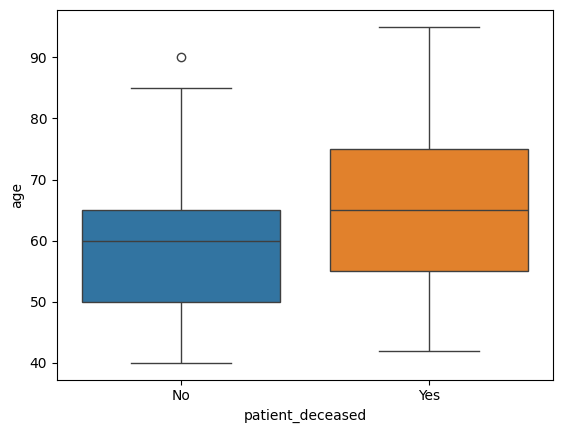

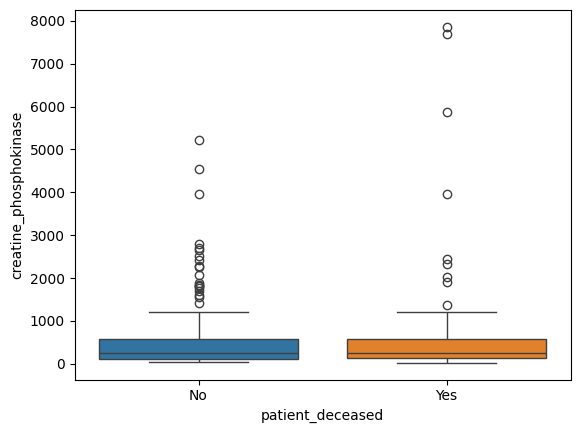

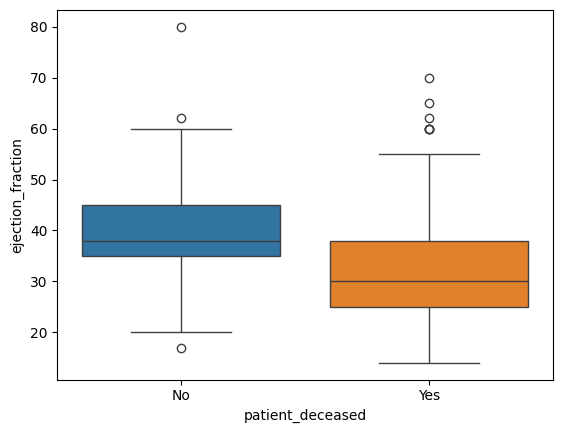

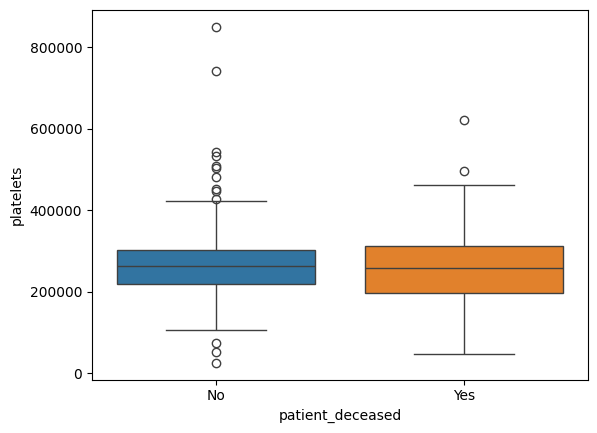

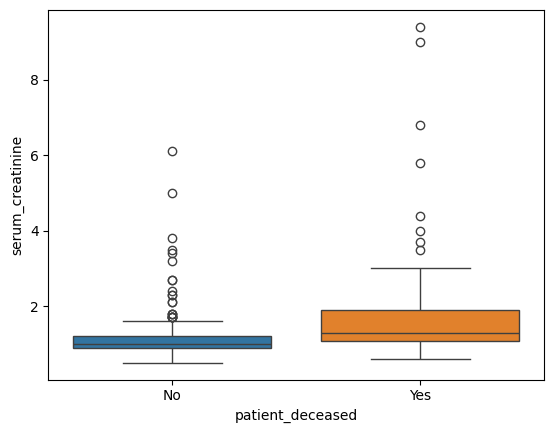

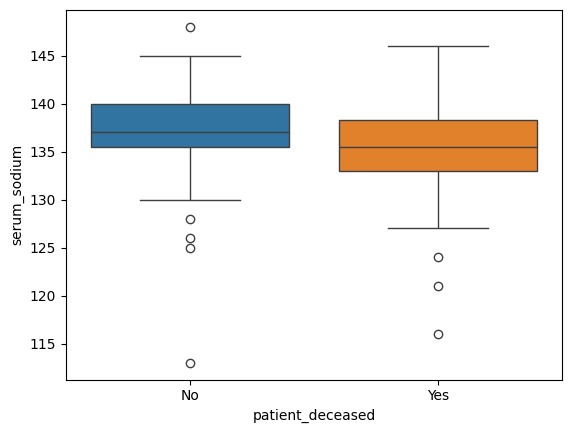

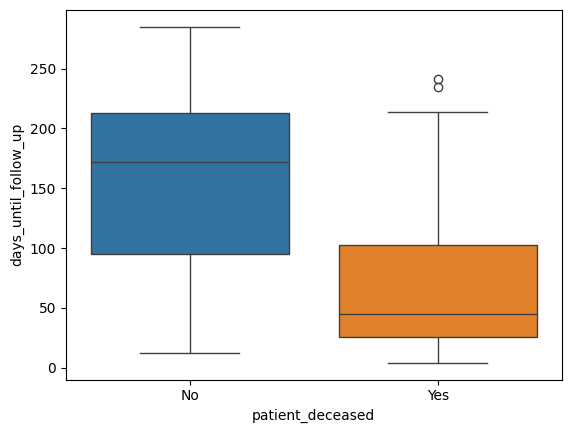

In [ ]:
for col in numerical_columns_names:
  sns.boxplot(data=df, x="patient_deceased", y=col, hue="patient_deceased", formatter=custom_formatter, legend=False)
  plt.show()

## Create New Dataset By Removing Outliers

In [ ]:
def get_outlier_bounds(df, col_name):
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  IQR = q3 - q1

  return np.round(q1 - 1.5 * IQR, 3), np.round(q3 + 1.5 * IQR, 3)

In [ ]:
filter_columns_names = ["creatine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]

filtered_df = df.copy()

for col in filter_columns_names:
  lower_bound, upper_bound = get_outlier_bounds(df, col)
  filtered_df = filtered_df[(filtered_df[col] > lower_bound) & (filtered_df[col] < upper_bound)]

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     223 non-null    float64
 1   anemia                  223 non-null    int64  
 2   creatine_phosphokinase  223 non-null    int64  
 3   diabetes                223 non-null    int64  
 4   ejection_fraction       223 non-null    int64  
 5   high_blood_pressure     223 non-null    int64  
 6   platelets               223 non-null    float64
 7   serum_creatinine        223 non-null    float64
 8   serum_sodium            223 non-null    int64  
 9   sex                     223 non-null    int64  
 10  smoker                  223 non-null    int64  
 11  days_until_follow_up    223 non-null    int64  
 12  patient_deceased        223 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 24.4 KB


In [ ]:
filtered_df.describe()

,age,anemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoker,days_until_follow_up,patient_deceased
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,60.745892,0.470852,335.426009,0.417040,38.080717,0.381166,255824.226771,1.127354,137.098655,0.645740,0.322870,132.327354,0.273543
std,11.934850,0.500273,279.225510,0.494179,11.645002,0.486766,67302.021363,0.328024,3.728288,0.479365,0.468625,76.597612,0.446780
min,40.000000,0.000000,30.000000,0.000000,14.000000,0.000000,122000.000000,0.600000,126.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,114.000000,0.000000,30.000000,0.000000,210000.000000,0.900000,134.500000,0.000000,0.000000,75.500000,0.000000
50%,60.000000,0.000000,212.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,120.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,297500.000000,1.300000,140.000000,1.000000,1.000000,203.000000,1.000000
max,95.000000,1.000000,1202.000000,1.000000,65.000000,1.000000,427000.000000,2.100000,148.000000,1.000000,1.000000,285.000000,1.000000


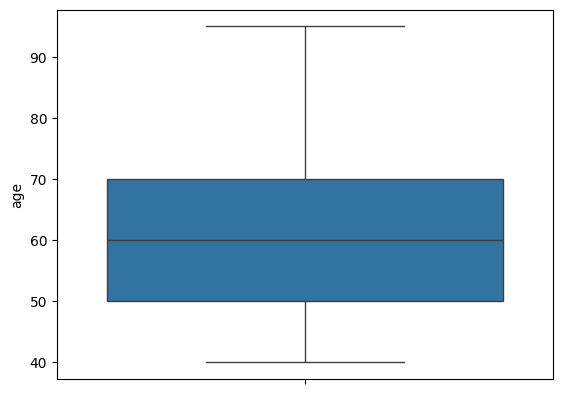

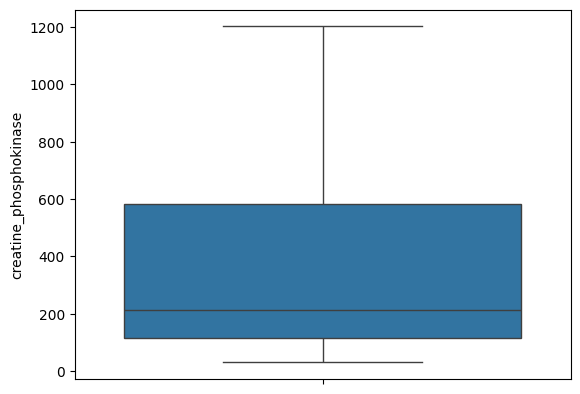

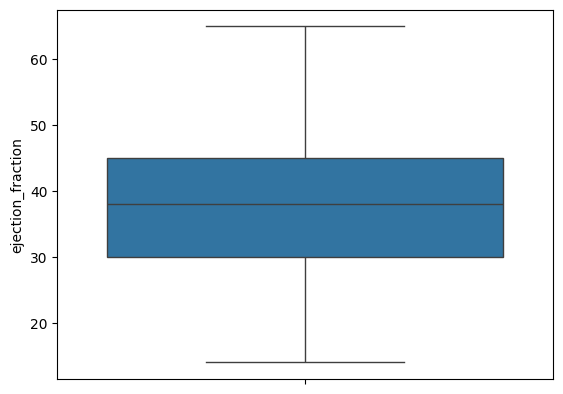

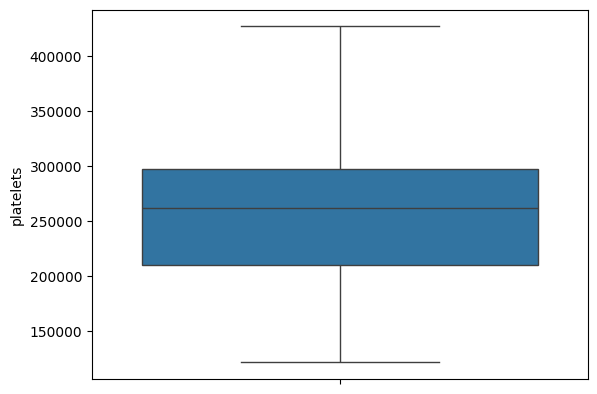

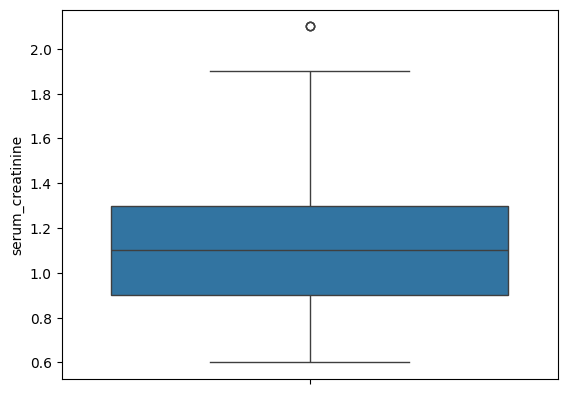

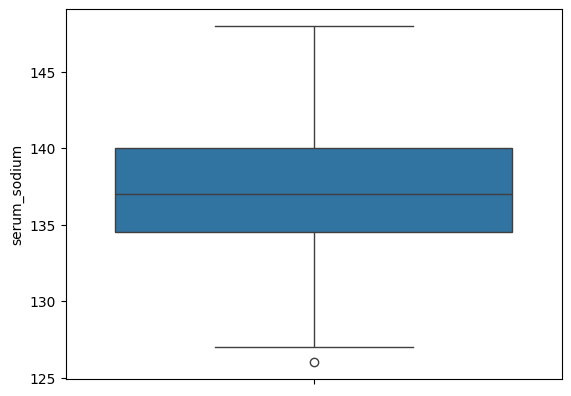

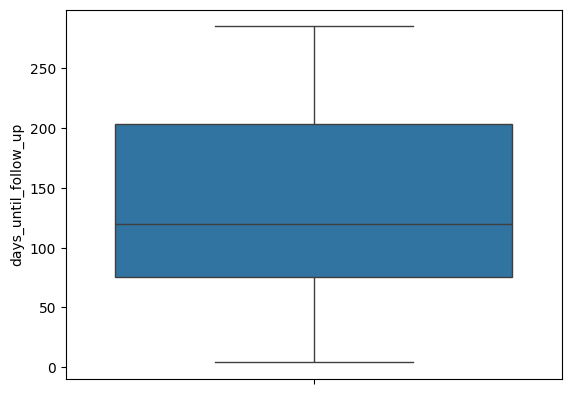

In [ ]:
for col in numerical_columns_names:
  sns.boxplot(data=filtered_df, y=col)
  plt.show()

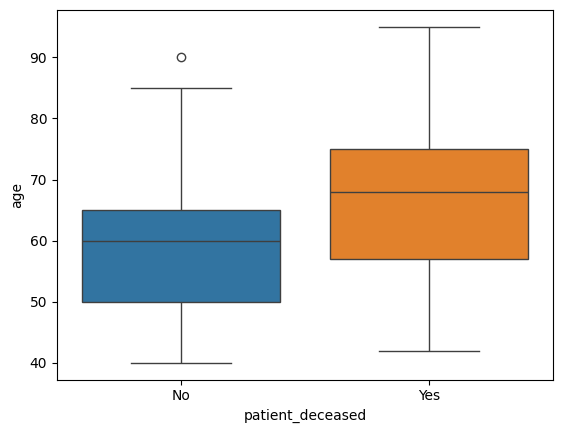

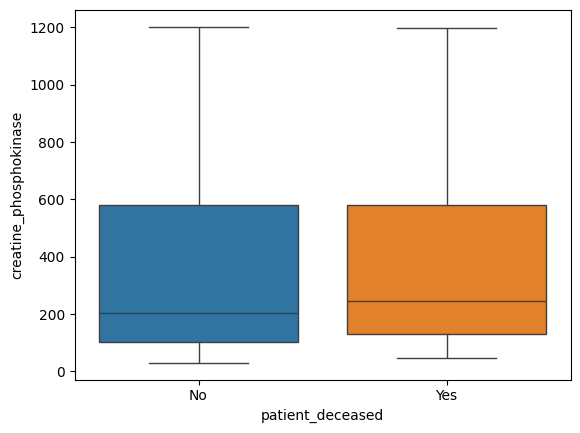

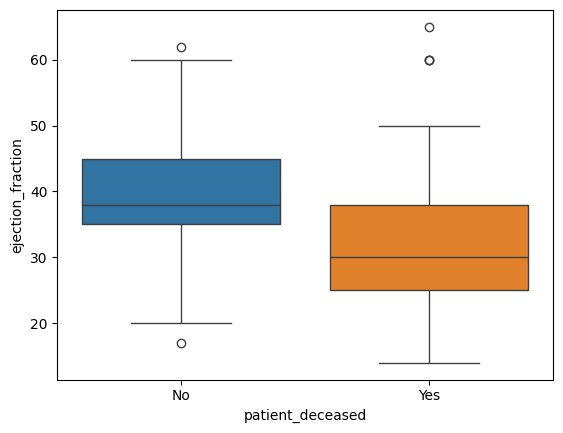

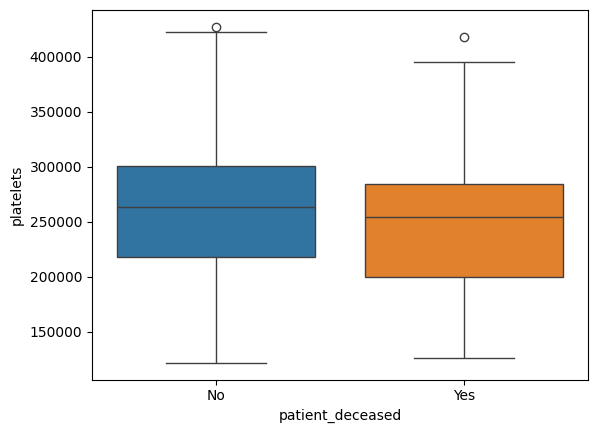

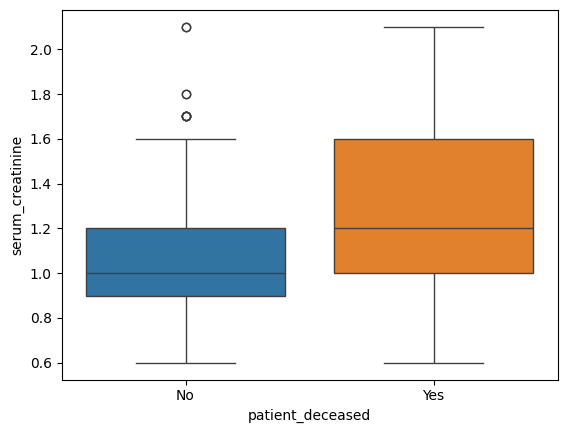

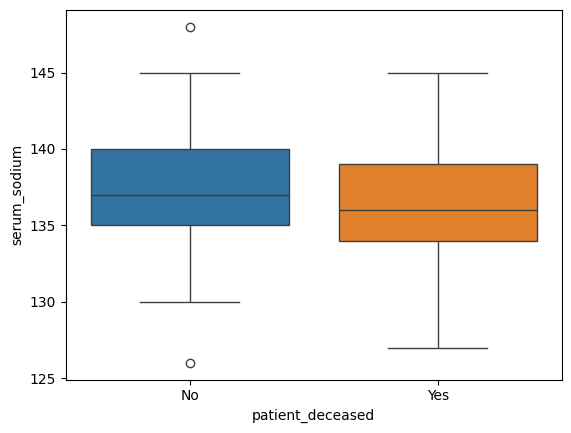

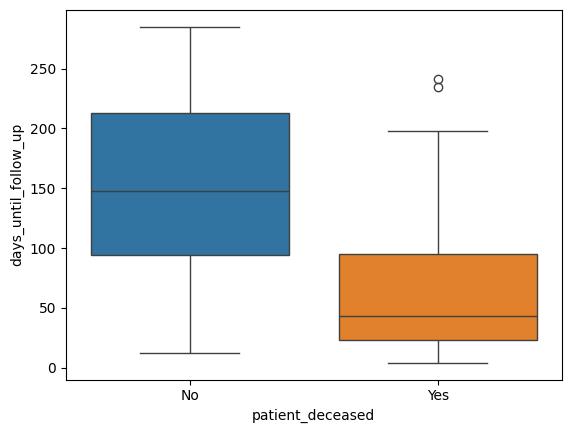

In [ ]:
for col in numerical_columns_names:
  sns.boxplot(data=filtered_df, x="patient_deceased", y=col, hue="patient_deceased", formatter=custom_formatter, legend=False)
  plt.show()

---

# Feature Selection

## K Best

In [ ]:
filtered_df_copy = filtered_df.copy()
# filtered_df_copy = filtered_df_copy.drop(columns=["days_until_follow_up"])
y = filtered_df_copy["patient_deceased"].copy()
X = filtered_df_copy.drop(columns=["patient_deceased"]).copy()
feature_column_names = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

k_best_classifier = SelectKBest(score_func=mutual_info_classif, k=7)
k_best_classifier = k_best_classifier.fit(X_train, y_train)

k_best_df = pd.DataFrame({
    'Feature Name': feature_column_names,
    'Importance': k_best_classifier.scores_
})
k_best_df = k_best_df.sort_values('Importance', ascending=False)
k_best_df

,Feature Name,Importance
11,days_until_follow_up,0.299244
4,ejection_fraction,0.185438
7,serum_creatinine,0.091891
10,smoker,0.042734
5,high_blood_pressure,0.040367
0,age,0.040124
6,platelets,0.013195
3,diabetes,0.010894
8,serum_sodium,0.010027
2,creatine_phosphokinase,0.009482


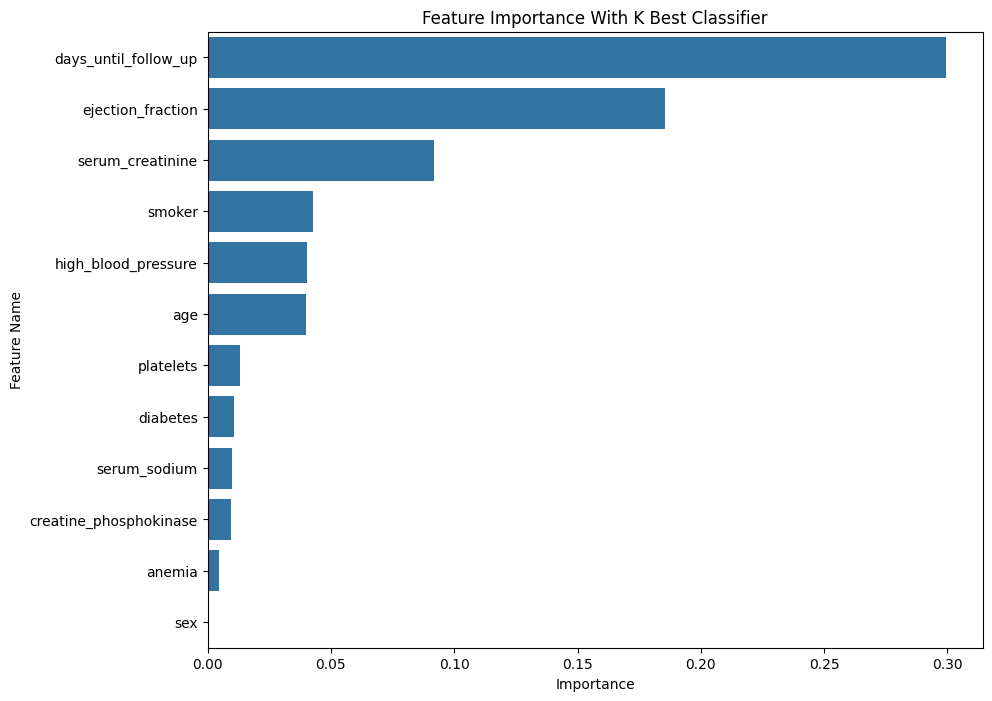

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature Name', data=k_best_df)
plt.title('Feature Importance With K Best Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

## Random Forest Classifier

In [ ]:
forest_classifier = RandomForestClassifier(random_state=42).fit(X_train, y_train)

feature_importance = forest_classifier.feature_importances_
feature_df = pd.DataFrame({
    'Feature Name': feature_column_names,
    'Importance': feature_importance
})

feature_df = feature_df.sort_values('Importance', ascending=False)
feature_df

,Feature Name,Importance
11,days_until_follow_up,0.388874
4,ejection_fraction,0.177788
7,serum_creatinine,0.115743
0,age,0.093784
6,platelets,0.065701
2,creatine_phosphokinase,0.051529
8,serum_sodium,0.044757
1,anemia,0.017163
10,smoker,0.015985
3,diabetes,0.011608


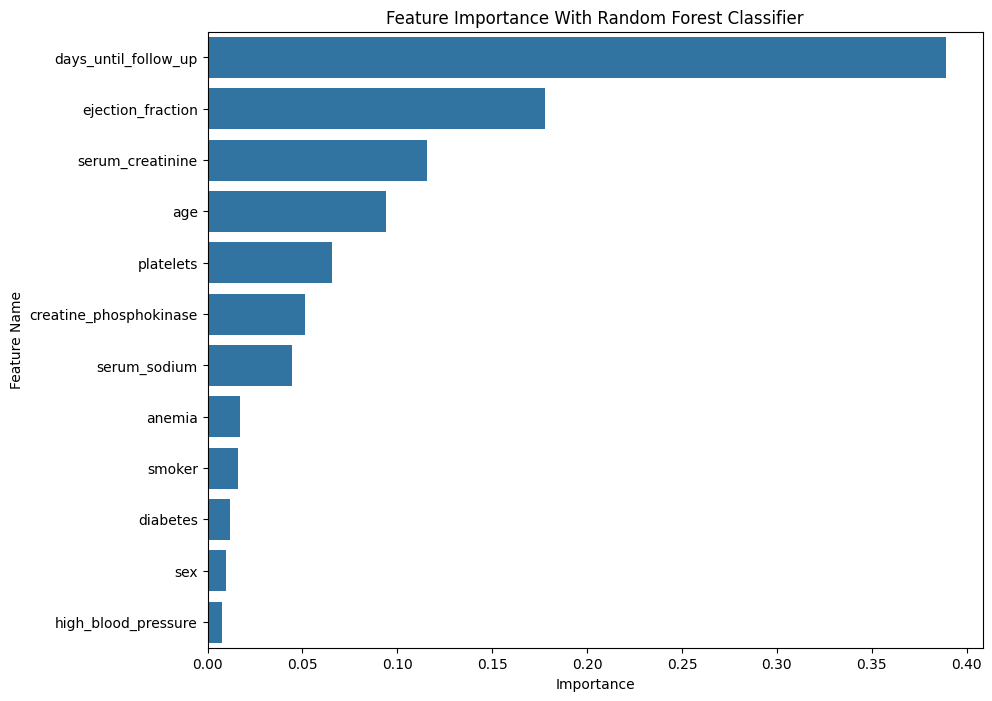

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature Name', data=feature_df)
plt.title('Feature Importance With Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

---

## RFE

In [ ]:
rfe = RFE(RandomForestClassifier(random_state=42), n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)
ranking = rfe.ranking_

ranking_df = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Ranking': ranking
})

ranking_df = ranking_df.sort_values('Ranking')
ranking_df

,Feature Name,Ranking
0,age,1
2,creatine_phosphokinase,1
4,ejection_fraction,1
6,platelets,1
7,serum_creatinine,1
11,days_until_follow_up,1
8,serum_sodium,2
10,smoker,3
1,anemia,4
9,sex,5


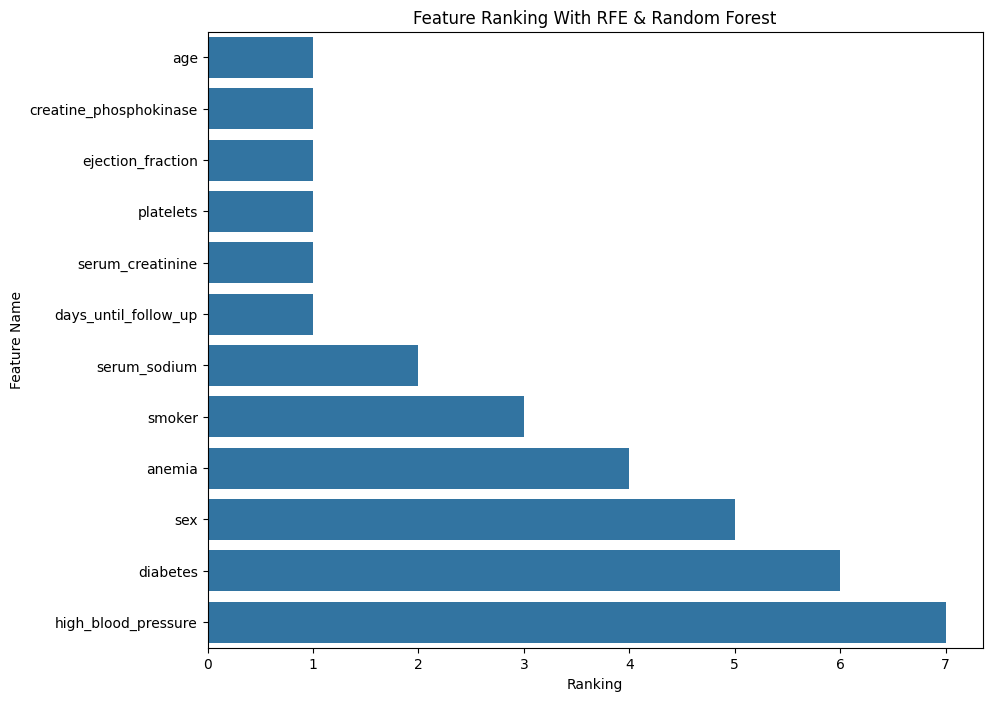

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Ranking', y='Feature Name', data=ranking_df)
plt.title('Feature Ranking With RFE & Random Forest')
plt.xlabel('Ranking')
plt.ylabel('Feature Name')
plt.show()

## Dataset Created Removing Irrelevant Features

In [ ]:
final_df = filtered_df.copy()
final_df = final_df.drop(columns=["smoker", "diabetes", "sex", "high_blood_pressure"])
final_df.head()

,age,anemia,creatine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,days_until_follow_up,patient_deceased
0,75.0,0,582,20,265000.0,1.9,130,4,1
2,65.0,0,146,20,162000.0,1.3,129,7,1
3,50.0,1,111,20,210000.0,1.9,137,7,1
5,90.0,1,47,40,204000.0,2.1,132,8,1
6,75.0,1,246,15,127000.0,1.2,137,10,1


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 298
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     223 non-null    float64
 1   anemia                  223 non-null    int64  
 2   creatine_phosphokinase  223 non-null    int64  
 3   ejection_fraction       223 non-null    int64  
 4   platelets               223 non-null    float64
 5   serum_creatinine        223 non-null    float64
 6   serum_sodium            223 non-null    int64  
 7   days_until_follow_up    223 non-null    int64  
 8   patient_deceased        223 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 17.4 KB


In [ ]:
final_df.to_csv("data/preprocessed_heart_failure_dataset.csv", index=False)

# PCA

['age', 'anemia', 'creatine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'days_until_follow_up']
Explained Variance Ratio: [0.2222988  0.17578621 0.1516754  0.14293185 0.11874572 0.10364817
 0.08491385]


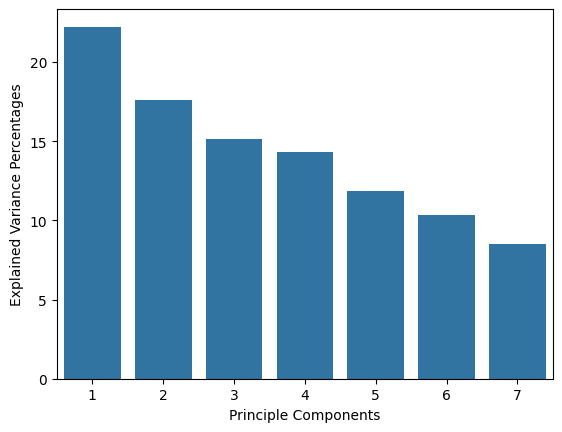

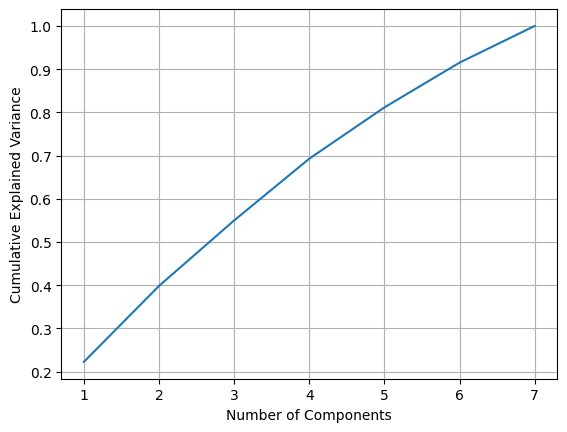

In [ ]:
final_df_copy = final_df.copy()
y = final_df_copy["patient_deceased"].copy()
X = final_df_copy.drop(columns=["patient_deceased"]).copy()
feature_column_names = ['age', 'anemia', 'creatine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'days_until_follow_up']
print(feature_column_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA().fit(X_std)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

explained_variance_ratio = pd.DataFrame(pca.explained_variance_ratio_ * 100, columns=['explained_variance_ratio'])
explained_variance_ratio.index += 1

sns.barplot(x=explained_variance_ratio.index, y='explained_variance_ratio', data=explained_variance_ratio)
plt.xlabel('Principle Components')
plt.ylabel('Explained Variance Percentages')
plt.show()

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot(x=np.arange(1, len(cumulative_variance) + 1), y=cumulative_variance)
plt.grid(True)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
pca = PCA(n_components=7)
principal_components = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data=principal_components)
principalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       223 non-null    float64
 1   1       223 non-null    float64
 2   2       223 non-null    float64
 3   3       223 non-null    float64
 4   4       223 non-null    float64
 5   5       223 non-null    float64
 6   6       223 non-null    float64
dtypes: float64(7)
memory usage: 12.3 KB
